# Multivariate Linear Regression

Predict the profit of a startup based on Marketing Spend and R&D Spend

In [80]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)
plt.rcParams['figure.figsize'] = [12, 9]
%matplotlib notebook

Load and process data. We're concerned with the R&D Spend, Marketing Spend and Profit, so we select those columns. We also want to filter out any columns that have both R&D Spend and Marketing Spend as $0.00.

In [81]:
df = pd.read_csv('data/50_startups.csv')
df = df[["R&D Spend", "Marketing Spend", "Profit"]]
df = df[(df["R&D Spend"] > 0) | (df["Marketing Spend"] > 0)]
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
...,...,...,...,...,...
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41


We're concerned with the R&D Spend and Marketing Spend. We are predicting profit

In [82]:
df = df[["R&D Spend", "Marketing Spend", "Profit"]]
df

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
...,...,...,...
45,1000.23,1903.93,64926.08
46,1315.46,297114.46,49490.75
47,0.00,0.00,42559.73
48,542.05,0.00,35673.41


We're gonna assume that row 47 that spent \$0.00 on marketing and R&D is an outlier and we can ignore rows like it

In [83]:
df = df[(df["R&D Spend"] > 0) | (df["Marketing Spend"] > 0)]
df

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
...,...,...,...
44,22177.74,28334.72,65200.33
45,1000.23,1903.93,64926.08
46,1315.46,297114.46,49490.75
48,542.05,0.00,35673.41


Now we extract our data and plot it!

<IPython.core.display.Javascript object>


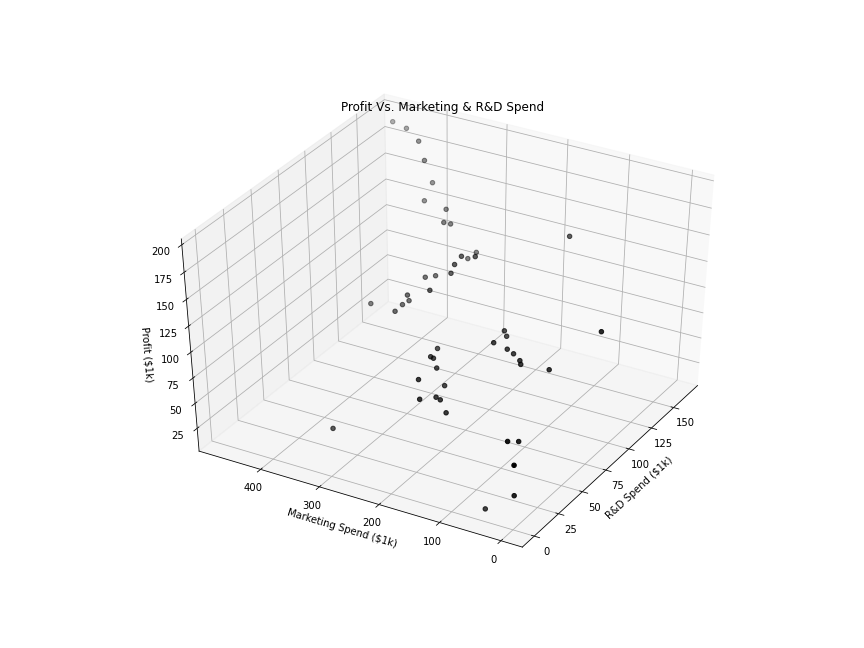

In [87]:
# Get data
x = df["R&D Spend"].to_numpy()
y = df["Marketing Spend"].to_numpy()
z = df["Profit"].to_numpy()

# Better formatting by dividing by 1000
xk = x / 1000
yk = y / 1000
zk = z / 1000

# Plot it!
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xk, yk, zk, c='k')
ax.view_init(azim=-150, elev=40)
ax.set_xlabel('R&D Spend ($1k)')
ax.set_ylabel('Marketing Spend ($1k)')
ax.set_zlabel('Profit ($1k)')
ax.set_title('Profit Vs. Marketing & R&D Spend')
fig.show()